<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/Timeseries_part-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
np.random.seed(7)

Dataset can be downloaded from - [Dataset](https://drive.google.com/file/d/1vzyTw56jCtTwHYYLYiNaAoJyML6H2g3s/view?usp=sharing)

In [ ]:
df = pd.read_csv("/content/Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [ ]:
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [ ]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)


In [ ]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
#features = [feature for feature in df.columns if feature not in targets]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  4199 non-null   object 
 1   rainfall              4199 non-null   float64
 2   depth_to_groundwater  4172 non-null   float64
 3   temperature           4199 non-null   float64
 4   drainage_volume       4198 non-null   float64
 5   river_hydrometry      4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [ ]:
from datetime import datetime, date
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4199 non-null   datetime64[ns]
 1   rainfall              4199 non-null   float64       
 2   depth_to_groundwater  4172 non-null   float64       
 3   temperature           4199 non-null   float64       
 4   drainage_volume       4198 non-null   float64       
 5   river_hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


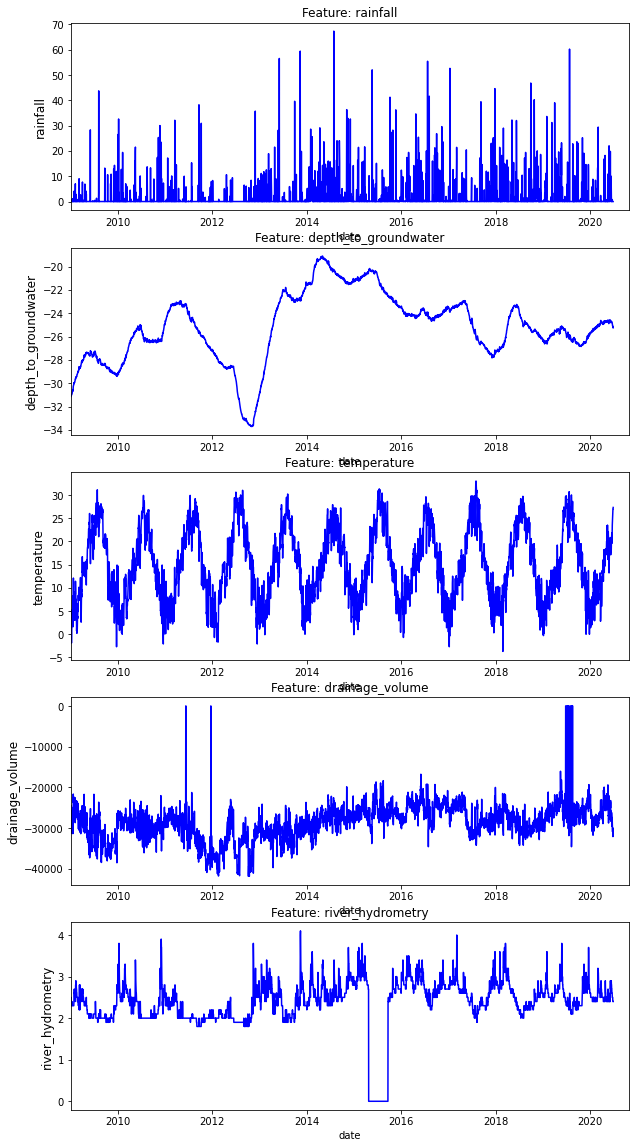

In [ ]:
# Let's plot all of the features agnist time
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i], color='blue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=12)
    ax[i].set_ylabel(ylabel=column, fontsize=12)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 10, 30)])

In [ ]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [ ]:
df['delta'].sum()

Timedelta('4198 days 00:00:00')

In [ ]:
df['delta'].count()

4198

In [ ]:
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

In [ ]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                      0
rainfall                  0
depth_to_groundwater     27
temperature               0
drainage_volume          26
river_hydrometry        150
dtype: int64

In [ ]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

#Resampling
Resampling the dataset inorder to get the additional information<p>

1. Upsampling : used when frequency of sample is increased

2. Downsampling : used when the frequency of sample is decreased

<p> in this problem will go with downsampling method

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

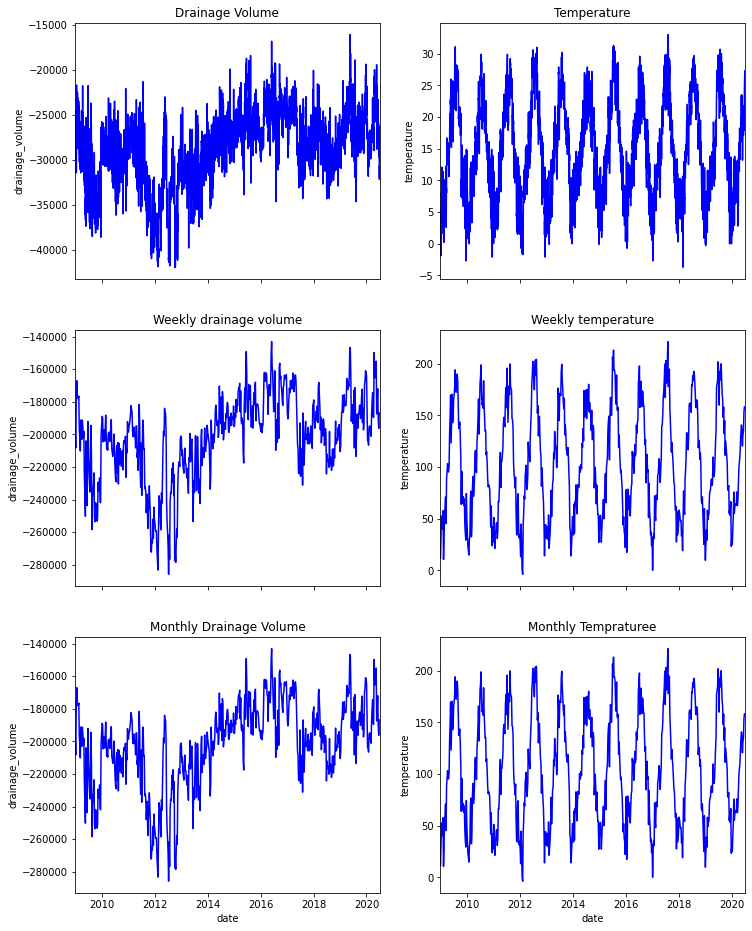

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize = (12,16))

sns.lineplot(df['date'], df['drainage_volume'], color = 'blue', ax = ax[0,0])
ax[0,0].set_title('Drainage Volume', fontsize = 12)

resampled_df = df[['date','drainage_volume']].resample('7D', on = 'date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color = 'blue', ax = ax[1,0])
ax[1,0].set_title('Weekly drainage volume', fontsize = 12)

resampled_df = df[['date','drainage_volume']].resample('7D', on = 'date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['drainage_volume'], color = 'blue', ax = ax[2,0])
ax[2,0].set_title('Monthly Drainage Volume', fontsize = 12)

for i in range(2):
  ax[i,0].set_xlim([date(2009,1,1), date(2020,6,30)])

sns.lineplot(df['date'], df['temperature'], color = 'blue', ax = ax[0,1])
ax[0,1].set_title('Temperature', fontsize = 12)

resampled_df = df[['date','temperature']].resample('7D', on = 'date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color = 'blue', ax = ax[1,1])
ax[1,1].set_title('Weekly temperature', fontsize = 12)

resampled_df = df[['date','temperature']].resample('7D', on = 'date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['temperature'], color = 'blue', ax = ax[2,1])
ax[2,1].set_title('Monthly Tempraturee', fontsize = 12)

for i in range(2):
  ax[i,1].set_xlim([date(2009,1,1), date(2020,6,30)])
plt.show()



In [ ]:
# As we can see, downsample to weekly could smooth the data and help with analysis
downsample = df[['date',
                 'depth_to_groundwater', 
                 'temperature',
                 'drainage_volume', 
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

Time series mpdel such as ARIMA takes the data as an stationary. Stationary in time-series is described as:

1. constant variance and variance is independent
2. constant covariance and covariance is independent
3. constant mean and mean is not time-dependent

let checkfor stationarity

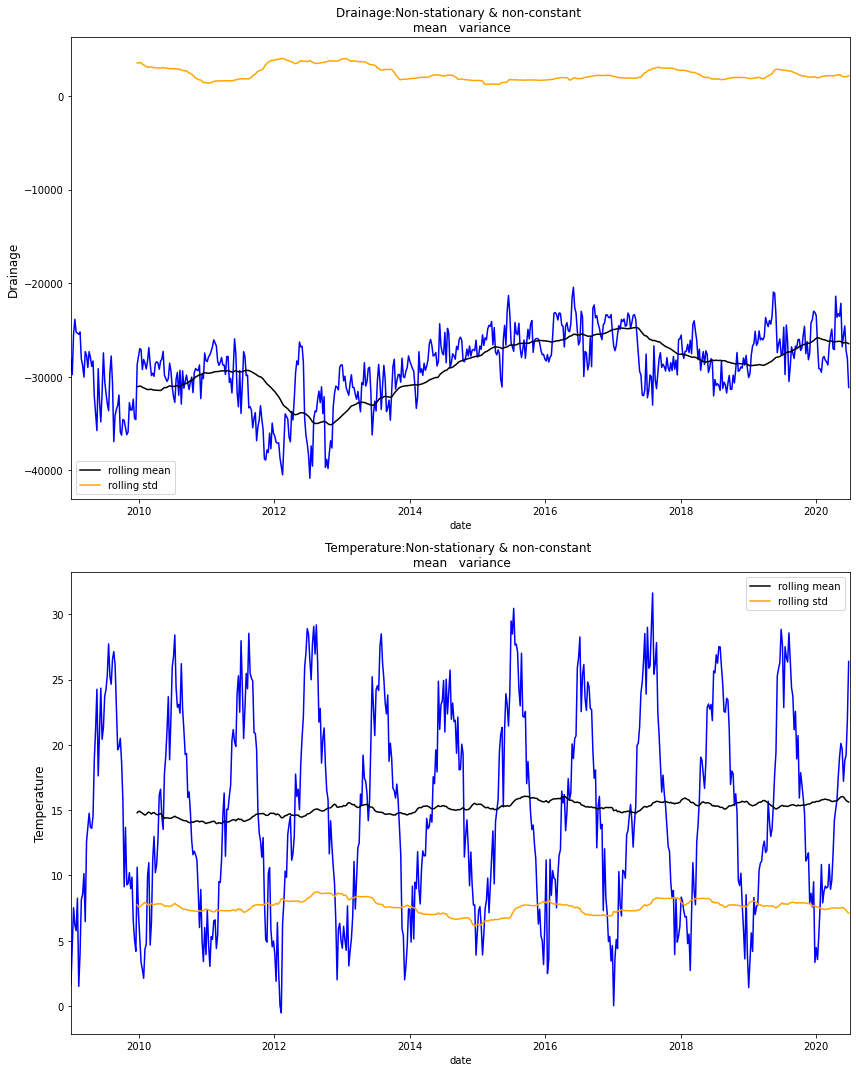

In [ ]:
weeks = 52
f, axis = plt.subplots(nrows=2, ncols=1, figsize=(12,15))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=axis[0],color='blue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(weeks).mean(), ax=axis[0],color='black',label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(weeks).std(), ax=axis[0],color='orange',label='rolling std')
axis[0].set_title('Drainage:Non-stationary & non-constant \n mean   variance', fontsize=12)
axis[0].set_ylabel(ylabel='Drainage', fontsize = 12)
axis[0].set_xlim([date(2009,1,1), date(2020,6,30)])


sns.lineplot(x=df['date'], y=df['temperature'], ax=axis[1],color='blue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(weeks).mean(), ax=axis[1],color='black',label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(weeks).std(), ax=axis[1],color='orange',label='rolling std')
axis[1].set_title('Temperature:Non-stationary & non-constant \n mean   variance', fontsize=12)
axis[1].set_ylabel(ylabel='Temperature', fontsize = 12)
axis[1].set_xlim([date(2009,1,1), date(2020,6,30)])

plt.tight_layout()
plt.show()

As we can see that the features don't have constant mean and std, but are near to it.

#URT (Unit Root Test)

A characterstics of time series that makes it non-stationary. The presence of URT states that the time-series is not-stationary.

#Augumented Dickey-Fuller (ADF)
Type of statistical test called Unit toot test. It is a cause of non-stationarity:

1. Null hypothesis : Time series has a unit root
2. Alternate hypothesis ; Time series has no unit root

To make time series stationary we have to remove null hypothesis. This can be done if the p-value is below a particular level another process to remove is that if the test statistics is less than the critical value.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['depth_to_groundwater'].values)
print(result)

print('one can see that the p-value is < 0.05 i.e.,', result[1])

(-2.880201649316661, 0.0476991909202088, 7, 592, {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}, -734.3154255877616)
one can see that the p-value is < 0.05 i.e., 0.0476991909202088


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


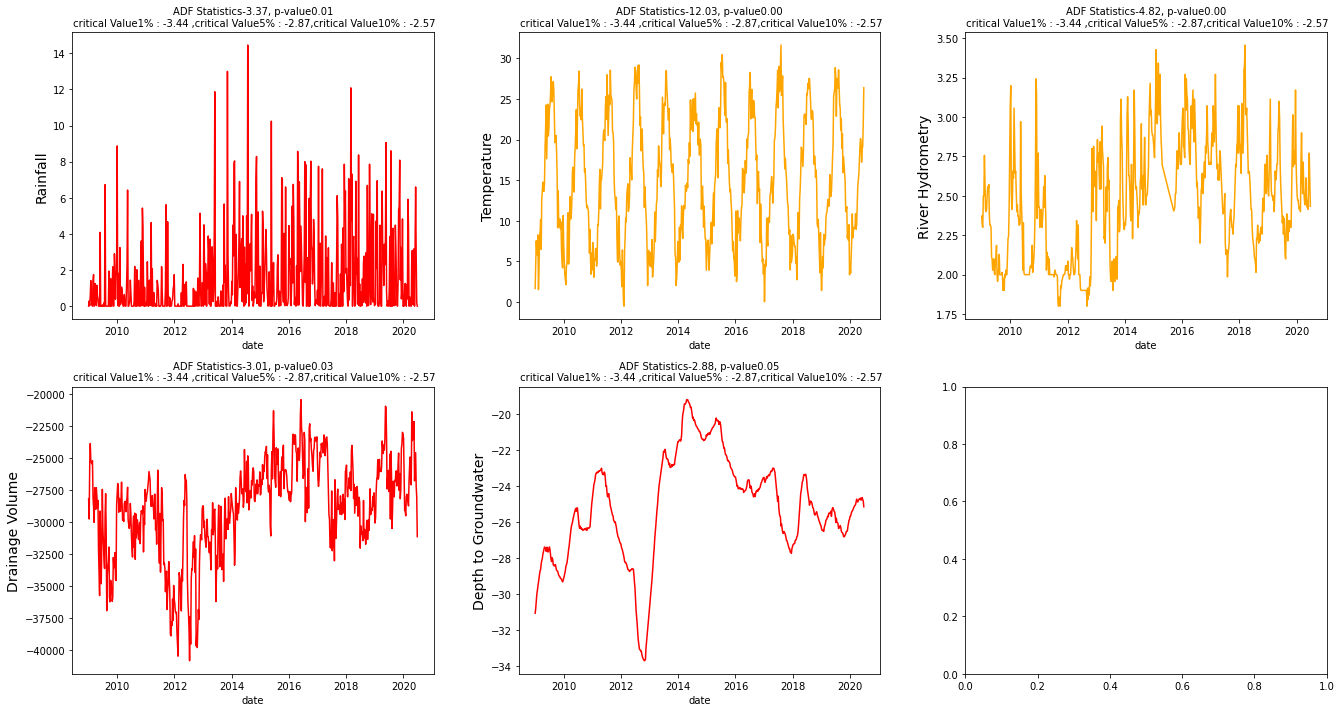

In [ ]:
f , ax = plt.subplots(nrows=2, ncols=3, figsize=(19,10))

def plot_adfresult(series, title, ax):
  result = adfuller(series)
  significant_level = 0.05
  adf_stat = result[0]
  p_val = result[1]
  criticalval_1 = result[4]['1%']
  criticalval_5 = result[4]['5%']
  criticalval_10  = result[4]['10%']

  if(p_val<significant_level) & ((adf_stat<criticalval_1)):
    linecolor = 'orange'
  elif(p_val<significant_level) & ((adf_stat<criticalval_5)):
    linecolor = 'red'
  elif(p_val<significant_level) & ((adf_stat<criticalval_1)):
    linecolor = 'yellow'
  else:
    linecolor = 'green'
  sns.lineplot(x=df['date'], y = series,ax=ax, color=linecolor)
  ax.set_title(f'ADF Statistics{adf_stat:.02f}, p-value{p_val:.2f}\n critical Value1% : {criticalval_1:.2f} ,critical Value5% : {criticalval_5:.2f},critical Value10% : {criticalval_10:.2f}', fontsize=10)
  ax.set_ylabel(ylabel=title, fontsize=14)
plot_adfresult(df['rainfall'].values,'Rainfall', ax[0,0])
plot_adfresult(df['temperature'].values,'Temperature', ax[0,1])
plot_adfresult(df['river_hydrometry'].values,'River Hydrometry', ax[0,2])
plot_adfresult(df[ 'drainage_volume'].values,'Drainage Volume', ax[1,0])
plot_adfresult(df['depth_to_groundwater'].values,'Depth to Groundwater', ax[1,1])

plt.tight_layout()
plt.show()



Transforming : Transforming time series data using log or root to stabilize non-constant variance

<p>Difference : Transforming time series data by subtracting the current value from the previous one

In [ ]:
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

ts_dif = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_dif)

In [ ]:
#Feature Engineering

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2009-01-01,2009,1,1,1,1,1,1
1,2009-01-08,2009,1,8,8,2,1,1
2,2009-01-15,2009,1,15,15,3,1,1
3,2009-01-22,2009,1,22,22,4,1,1
4,2009-01-29,2009,1,29,29,5,1,1


#Cyclical Features
It is a time feature.

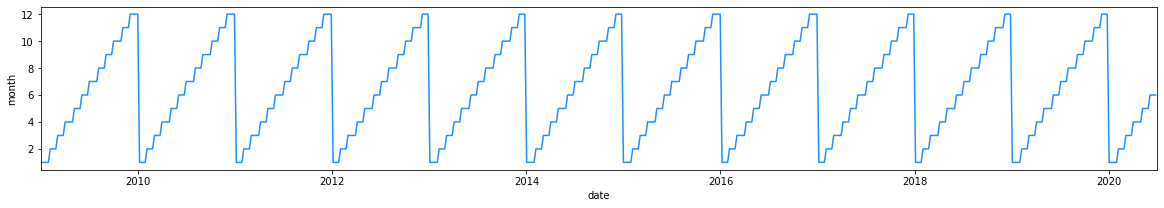

In [ ]:
f, axis = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
axis.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

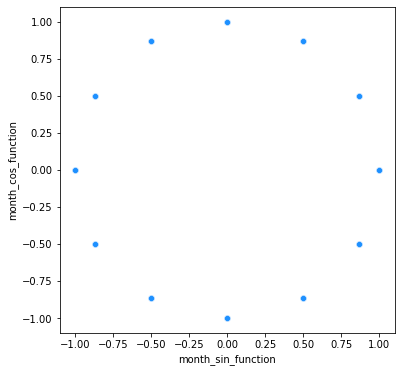

In [ ]:
month = 12
df['month_sin_function'] = np.sin(2*np.pi*df['month']/month)
df['month_cos_function'] = np.cos(2*np.pi*df['month']/month)

f, axis = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin_function, y=df.month_cos_function, color='dodgerblue')
plt.show()

#Decomposition

This involves combination of level, trends, noise and seasonality components. Performing decomposition provides useful information about time series and also provides the better understanding of problem during forcasting and analysis.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['rainfall', 'temperature', 'drainage_volume', 'river_hydrometry', 'depth_to_groundwater']

for column in core_columns:
    decomp = seasonal_decompose(df[column], freq =12,model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [ ]:
month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * month)

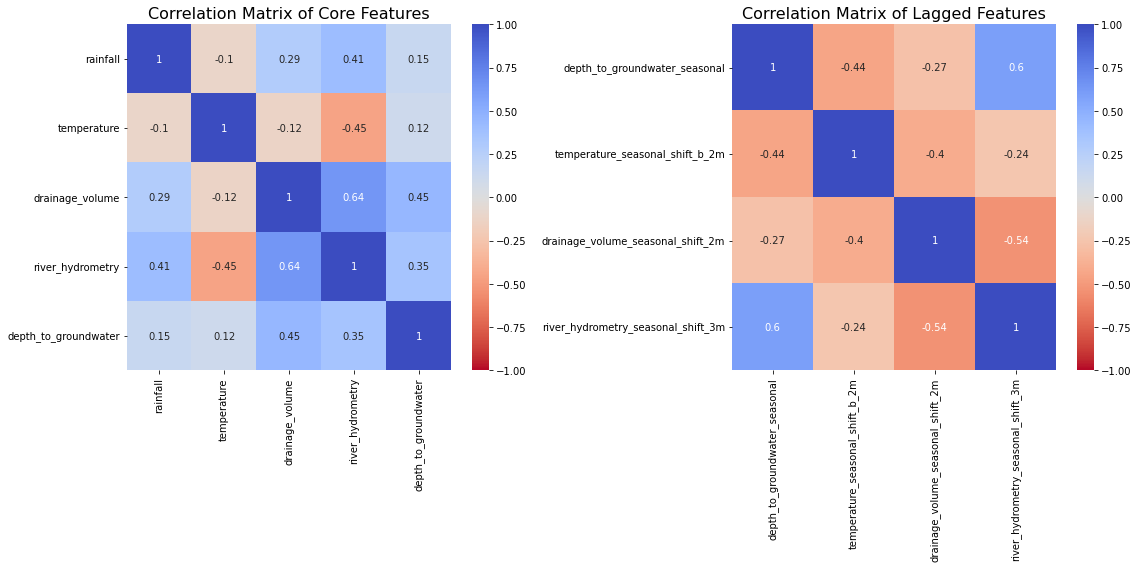

In [ ]:
#Time series analysis
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',         
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m', 
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()


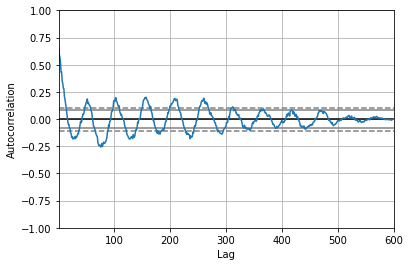

In [ ]:
#Auto-correlation
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

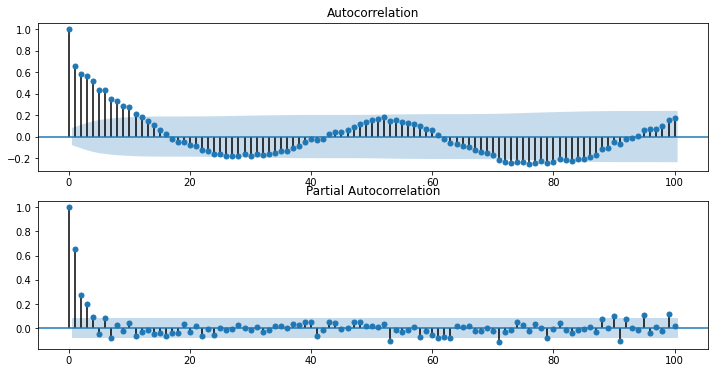

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, axis = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=axis[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=axis[1])

plt.show()

In [ ]:
#Modeling time series data
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [ ]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

510 90


#ARIMA
The Auto-Regressive Integrated Moving Average gives the autocorrelation in the data. In general ARIMA model assumes that time series is stationary. I consist of Auto-Regressive, Integration filter and moving average filter


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(90)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 0.8858256599356032


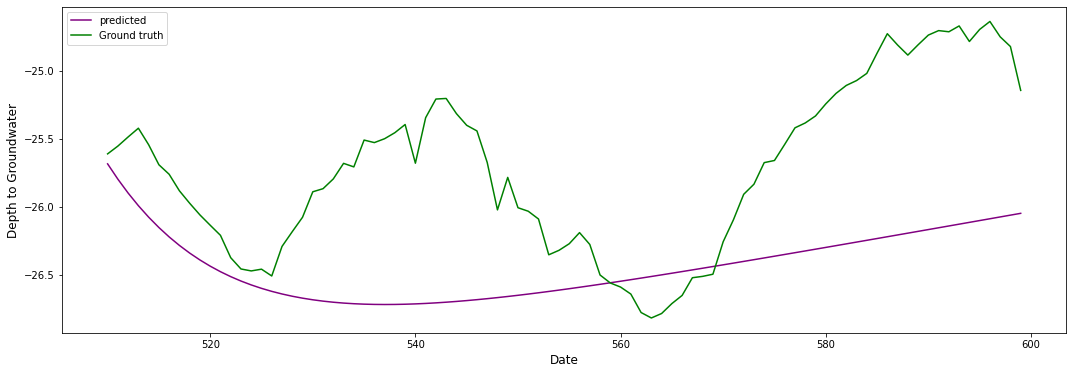

In [ ]:
f, ax = plt.subplots(1,figsize=(18,6))

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='purple', label='predicted') 
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='green', label='Ground truth')

ax.set_xlabel(xlabel='Date', fontsize=12)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=12)

plt.show()